# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
dataset = pd.read_csv('C:/Users/rich chang/Documents/GitHub/3rd-ML100Days/data/application_train.csv')
dataset.shape


(307511, 122)

### 之前做過的處理

In [2]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in dataset:
    if dataset[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(dataset[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            dataset[col] = le.fit_transform(dataset[col])            
print(dataset.shape)
dataset.head()


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
dataset['DAYS_EMPLOYED_ANOM'] = dataset["DAYS_EMPLOYED"] == 365243
dataset['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
dataset['DAYS_BIRTH'] = abs(dataset['DAYS_BIRTH'])


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [4]:
# 新增欄位 "equal_width_AMT_INCOME_TOTAL", 對 "AMT_INCOME_TOTAL" 做等寬劃分
dataset["equal_width_AMT_INCOME_TOTAL"] = pd.cut(dataset["AMT_INCOME_TOTAL"], 10)

# 觀察等寬劃分下, 每個種組距各出現幾次
dataset["equal_width_AMT_INCOME_TOTAL"].value_counts()




(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(105302565.0, 117000000.0]         1
(93605130.0, 105302565.0]          0
(81907695.0, 93605130.0]           0
(70210260.0, 81907695.0]           0
(58512825.0, 70210260.0]           0
(46815390.0, 58512825.0]           0
(35117955.0, 46815390.0]           0
(23420520.0, 35117955.0]           0
Name: equal_width_AMT_INCOME_TOTAL, dtype: int64

In [5]:
# 新增欄位 "equal_width_AMT_INCOME_TOTAL", 對 "AMT_INCOME_TOTAL" 做等頻劃分
dataset["equal_width_AMT_INCOME_TOTAL"] = pd.qcut(dataset["AMT_INCOME_TOTAL"], 12)

# 觀察等頻劃分下, 每個種組距各出現幾次
# 盡可能將每組 bin 的資料筆數相同，但 307511 不能整除12以內的數
dataset["equal_width_AMT_INCOME_TOTAL"].value_counts() 


(117000.0, 135000.0]       46271
(90000.0, 112500.0]        42656
(157500.0, 180000.0]       32529
(76500.0, 90000.0]         30831
(147150.0, 157500.0]       29295
(25649.999, 76500.0]       27091
(202500.0, 225000.0]       24420
(225000.0, 292500.0]       24230
(292500.0, 117000000.0]    22888
(180000.0, 202500.0]       20389
(135000.0, 147150.0]        4333
(112500.0, 117000.0]        2578
Name: equal_width_AMT_INCOME_TOTAL, dtype: int64

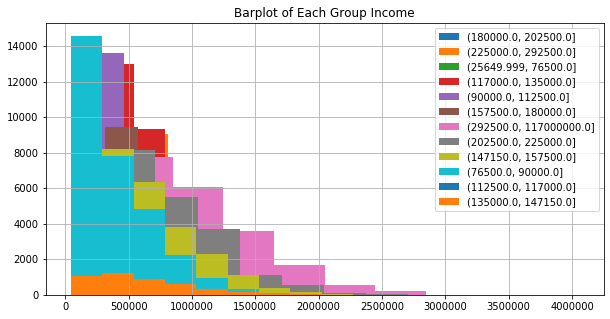

In [7]:
income_grp = dataset["equal_width_AMT_INCOME_TOTAL"].unique()

plt.figure(figsize=(10,5))
for i in range(len(income_grp)):
    dataset.loc[dataset["equal_width_AMT_INCOME_TOTAL"]==income_grp[i] ,'AMT_CREDIT'].hist(label=income_grp[i])
    plt.legend()
plt.legend()
# plt.xlabel('Age (years)')
# plt.ylabel('Income (dollars)')
plt.title('Barplot of Each Group Income')
plt.show()
